In [1]:
%matplotlib widget

In [2]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

In [3]:
files = glob.glob("*.xy")

In [4]:
files

['23-019-AG_2thomscan long scan_exported.xy',
 '23-020-AG_2thomscan_exported.xy',
 '23-014-AG_2thomegascan_long_exported.xy',
 '23-016-AG_2thomegascan_long_exported.xy',
 '23-017-AG_2thomegascan_long_exported.xy',
 '23-018-AG_01_2thomscan_exported.xy']

In [5]:
files[0]

'23-019-AG_2thomscan long scan_exported.xy'

In [6]:
files[1]

'23-020-AG_2thomscan_exported.xy'

# load ascii data and skip first row that contains header info

In [7]:
arr = np.loadtxt(files[0], skiprows=1)

In [8]:
arr

array([[10.       ,  4.       ],
       [10.004    ,  4.       ],
       [10.008    ,  1.5      ],
       ...,
       [49.9920019,  1.5      ],
       [49.9960019,  3.       ],
       [50.0000019,  3.       ]])

In [9]:
arr.shape

(10001, 2)

In [10]:
arr.dtype

dtype('float64')

In [11]:
arr.sum()

27446190.05950044

In [12]:
arr[0]

array([10.,  4.])

In [13]:
arr[0,0]

10.0

rename columns for convenience

In [14]:
twotheta = arr[:,0]
intensity = arr[:,1]

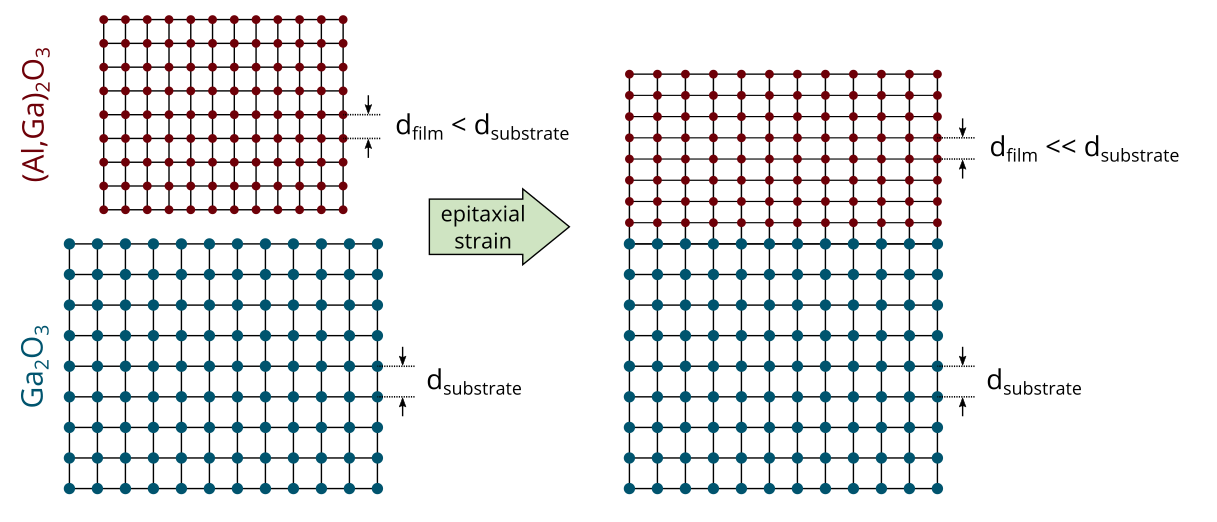


Bragg's law: $n\lambda = 2 d \sin\theta$

plot on logarithmic scale

(44.0, 47.0)

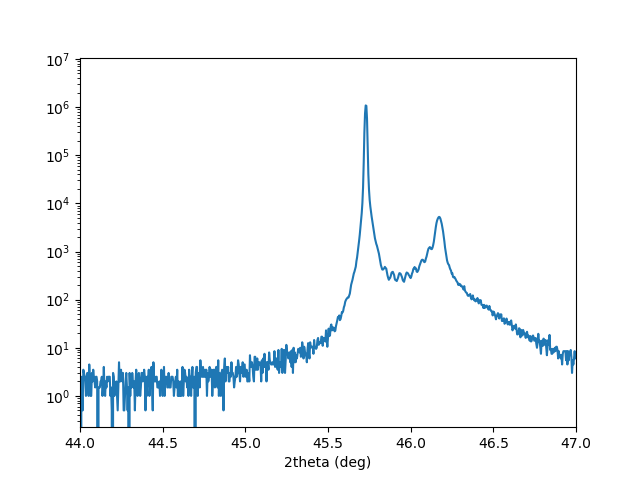

In [15]:
plt.figure()
plt.plot(twotheta, intensity)
plt.yscale("log")
plt.xlabel("2theta (deg)")
plt.xlim(44, 47)

**find the peak maximum position**

1083805.7 45.7280016969889


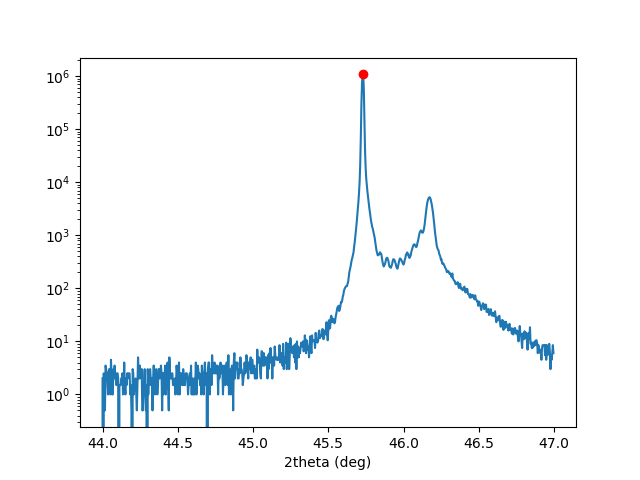

In [19]:



# mask out a region of interest
mask = (twotheta > 44) * (twotheta < 47)
tth_region = twotheta[mask]
I_region = intensity[mask]

plt.figure()
plt.plot(tth_region, I_region)
plt.yscale("log")
plt.xlabel("2theta (deg)")


imax = I_region.argmax()
print(I_region[imax], tth_region[imax])
plt.plot(tth_region[imax],I_region[imax],  "or")

In [20]:
mindist = 0.075 # to find the second peak, we define some min. distance of the peaks. There are probably more clever ways..


Text(0.5, 0, '2theta (deg)')

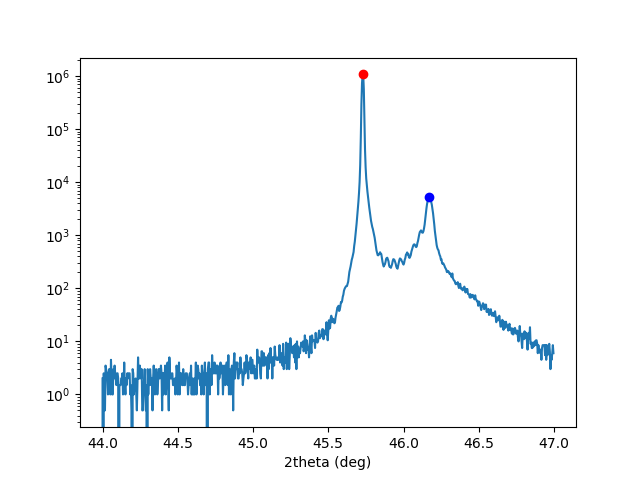

In [21]:

# find the second peak / mask a second region
mask2 = abs(tth_region - tth_region[imax]) > mindist

tth_film = tth_region[mask2]
I_film = I_region[mask2]

imax2 = I_film.argmax()


plt.figure()
plt.plot(tth_region, I_region)
plt.yscale("log")
plt.plot(tth_region[imax], I_region[imax],  "or")
plt.plot(tth_film[imax2], I_film[imax2],  "ob")
plt.xlabel("2theta (deg)")



The `max` position is not very precise as it is prone to noise and step size discretization

A more precise way of finding the peak position is the center of mass or weighted average.

We define a function for this purpose.

In [29]:
def get_cen(x, y, threshold=1/10):
    # the threshold sets the level of values to ignore
    w = y - y.max()/5
    w = np.clip(w, 0, None)
    cen = np.average(x, weights=w)
    return cen


Text(0.5, 0, '2theta (deg)')

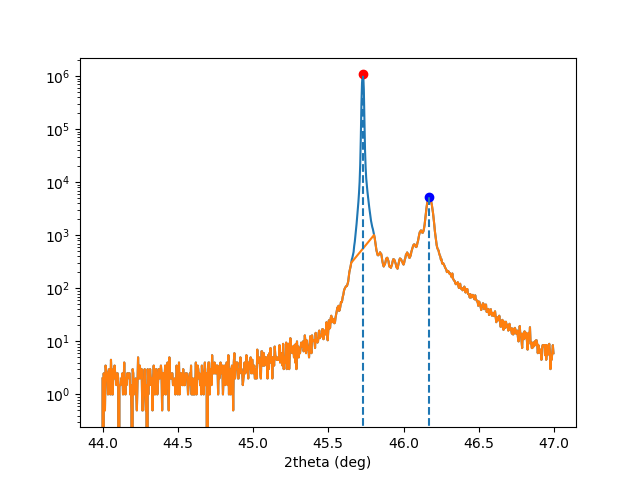

In [30]:


cen_subs = get_cen(tth_region, I_region)
cen_film = get_cen(tth_film, I_film, 1/2)

plt.figure()
line = plt.plot(tth_region, I_region)[0]
maincolor = line.get_color()
plt.plot(tth_film, I_film)
plt.yscale("log")
plt.plot(tth_region[imax], I_region[imax],  "or")
plt.plot(tth_film[imax2], I_film[imax2],  "ob")

# plt.plot(tth_film, w,  "-")
plt.plot([cen_subs, cen_subs], [I_region.min(), I_region.max()],  "--", color=maincolor)
plt.plot([cen_film, cen_film], [I_film.min(), I_film.max()],  "--", color=maincolor)
# plt.plot([cen, cen], [I_film.min(), I_film.pmax()],  "--r")

plt.xlabel("2theta (deg)")




# load calibration curve relating peak position to Al-content in $Al_{2x}Ga_{2(1-x)}O_{3}$

also make a polynomial (2nd order) fit allowing us to interpolate the calibration curve

In [31]:
x, tth_600 = np.loadtxt("tth_vs_x_strained.dat", skiprows=1, unpack=True)

Text(0, 0.5, '2theta of 600 reflection (deg)')

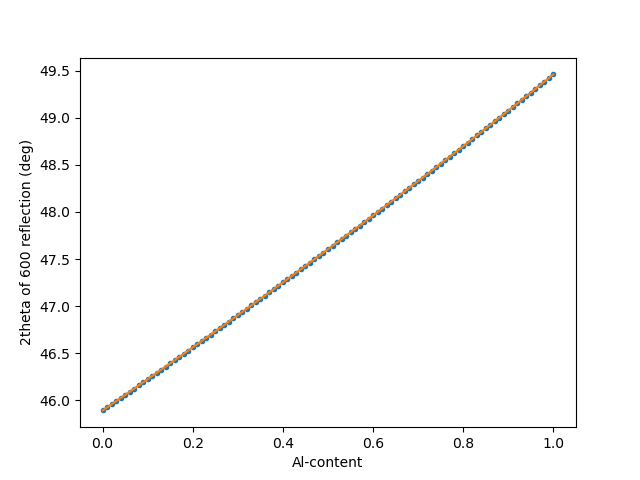

In [32]:
plt.figure()
plt.plot(x, tth_600, ".")

poly = np.polyfit(tth_600, x, 2)
x_vs_tth = np.poly1d(poly)


plt.plot(x_vs_tth(tth_600), tth_600, "-")
plt.xlabel("Al-content")
plt.ylabel("2theta of 600 reflection (deg)")


23-019-AG_2thomscan long scan_exported.xy 46.33605989514909 0.13276748538541128
23-020-AG_2thomscan_exported.xy 46.428531154475884 0.16020214569970292
23-014-AG_2thomegascan_long_exported.xy 46.00885758383013 0.03482339755795394
23-016-AG_2thomegascan_long_exported.xy 46.09690387084854 0.06131220535642967
23-017-AG_2thomegascan_long_exported.xy 46.14881888931193 0.07688492108546185
23-018-AG_01_2thomscan_exported.xy 46.2008599541461 0.09246122220114827


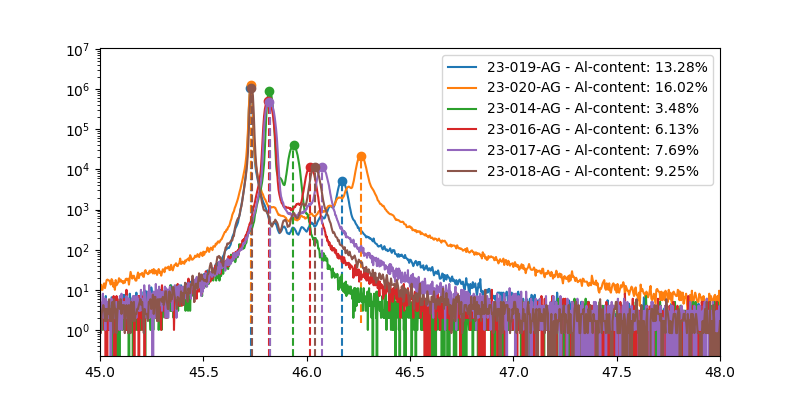

In [33]:
plt.figure(figsize=(8,4))


results = []

for path in files:
    arr = np.loadtxt(path, skiprows=1)
    twotheta = arr[:,0]
    intensity = arr[:,1]

    mask = (twotheta > 44) * (twotheta < 47)
    tth_region = twotheta[mask]
    I_region = intensity[mask]
    imax = I_region.argmax()

    line = plt.plot(twotheta, intensity)[0]
    maincolor = line.get_color()
    

    mask2 = abs(tth_region - tth_region[imax]) > mindist
    tth_film = tth_region[mask2]
    I_film = I_region[mask2]
    imax2 = I_film.argmax()


    plt.plot(tth_region[imax], I_region[imax],  marker="o", color=maincolor)
    plt.plot(tth_film[imax2], I_film[imax2],  marker="o", color=maincolor)

    cen_subs = get_cen(tth_region, I_region)
    cen_film = get_cen(tth_film, I_film)
    d2theta = cen_film - cen_subs
    tth_film_corr = tth_600[x.argmin()] + d2theta
    Al_content = x_vs_tth(tth_film_corr)

    
    mylabel = "%s - Al-content: %.2f%%"%(path.split("_")[0], Al_content*100)
    line.set_label(mylabel)
    
    results.append((path, tth_film_corr, Al_content))

    print(path, tth_film_corr, Al_content)

    # plt.plot(tth_film, w,  "-")
    plt.plot([cen_subs, cen_subs], [I_region.min(), I_region.max()],  "--", color=maincolor)
    plt.plot([cen_film, cen_film], [I_film.min(), I_film.max()],  "--", color=maincolor)
    # plt.plot([cen, cen], [I_film.min(), I_film.pmax()],  "--r")


plt.legend()
plt.yscale("log")
plt.xlim(45, 48)
plt.savefig("peakpos.pdf")

In [34]:
np.savetxt("Al-content_fit.txt", np.array(results), fmt="%s")